In [84]:
#Importing the libraries
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize, sent_tokenize
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
from sklearn.feature_extraction.text import TfidfVectorizer
import requests
from bs4 import BeautifulSoup as bs

In [85]:
mac_reviews = []

In [86]:
#Scapping the reviews of Redmi Phone from amazon using Beautiful Soup & requests
for i in range(1,95):
  op = []
  url = "https://www.amazon.in/Apple-MacBook-Chip-13-inch-256GB/product-reviews/B08N5W4NNB/ref=cm_cr_getr_d_paging_btm_prev_1?ie=UTF8&reviewerType=all_reviews&pageNumber="+str(i)
  response = requests.get(url)
  soup = bs(response.content, 'html.parser')
  reviews = soup.findAll('span', attrs={'class', 'a-size-base review-text review-text-content'})
  for i in range(len(reviews)):
    op.append(reviews[i].text)
  mac_reviews = mac_reviews+op

In [87]:
mac_reviews

["\n1. Performance:The M1 MacBook Air is incredibly fast and efficient. The M1 chip's performance is on par with or even surpasses many Intel-based MacBook Pros, making it one of the most powerful laptops in its class. Whether you're a casual user, a creative professional, or a developer, it handles most tasks with ease.2. Battery Life:One of the standout features of the M1 MacBook Air is its impressive battery life. Users report getting 12-15 hours of real-world use, which is a significant improvement over previous Intel-based MacBook Air models. You can go an entire workday or more without needing to charge it.3. Fanless Design:The M1 MacBook Air is fanless, which means it operates silently. This is a big plus for those who value a quiet working environment.4. Portability:The MacBook Air remains one of the most portable laptops on the market. It's lightweight, slim, and has a high-quality Retina display. Its build quality is top-notch.5. Compatibility:The transition from Intel to App

In [88]:
#Saving the file into a text file with phone reviews
with open('mac_reviews.txt', 'w', encoding ='utf-8') as output:
  output.write(str(mac_reviews))

In [89]:
type(mac_reviews)

list

In [90]:
#joining the mac_reviews
text = ' '.join(mac_reviews)
text[0:100]

"\n1. Performance:The M1 MacBook Air is incredibly fast and efficient. The M1 chip's performance is on"

In [91]:
#removing special characters and symbols
text = re.sub('[^A-Za-z' ']+', ' ', text).lower()
text = re.sub('[0-9' ']+', ' ', text)
text[0:100]

' performance the m macbook air is incredibly fast and efficient the m chip s performance is on par w'

In [92]:
#tokenizing the words
token = text.split(' ')
token[0:20]

['',
 'performance',
 'the',
 'm',
 'macbook',
 'air',
 'is',
 'incredibly',
 'fast',
 'and',
 'efficient',
 'the',
 'm',
 'chip',
 's',
 'performance',
 'is',
 'on',
 'par',
 'with']

In [93]:
#removing the extra spaces
proper_text = [s.strip() for s in token]
proper_text = [s for s in token if s]
proper_text[0:20]

['performance',
 'the',
 'm',
 'macbook',
 'air',
 'is',
 'incredibly',
 'fast',
 'and',
 'efficient',
 'the',
 'm',
 'chip',
 's',
 'performance',
 'is',
 'on',
 'par',
 'with',
 'or']

In [94]:
#downloading the stopwords and the nltk tool-kit
!pip install nltk
import nltk
nltk.download('stopwords')
nltk.download('punkt')
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [95]:
#removing the stop words
no_stop_tokens = [a for a in proper_text if not a in stop_words]
no_stop_tokens[0:20]

['performance',
 'macbook',
 'air',
 'incredibly',
 'fast',
 'efficient',
 'chip',
 'performance',
 'par',
 'even',
 'surpasses',
 'many',
 'intel',
 'based',
 'macbook',
 'pros',
 'making',
 'one',
 'powerful',
 'laptops']

In [96]:
no_stop_tokens

['performance',
 'macbook',
 'air',
 'incredibly',
 'fast',
 'efficient',
 'chip',
 'performance',
 'par',
 'even',
 'surpasses',
 'many',
 'intel',
 'based',
 'macbook',
 'pros',
 'making',
 'one',
 'powerful',
 'laptops',
 'class',
 'whether',
 'casual',
 'user',
 'creative',
 'professional',
 'developer',
 'handles',
 'tasks',
 'ease',
 'battery',
 'life',
 'one',
 'standout',
 'features',
 'macbook',
 'air',
 'impressive',
 'battery',
 'life',
 'users',
 'report',
 'getting',
 'hours',
 'real',
 'world',
 'use',
 'significant',
 'improvement',
 'previous',
 'intel',
 'based',
 'macbook',
 'air',
 'models',
 'go',
 'entire',
 'workday',
 'without',
 'needing',
 'charge',
 'fanless',
 'design',
 'macbook',
 'air',
 'fanless',
 'means',
 'operates',
 'silently',
 'big',
 'plus',
 'value',
 'quiet',
 'working',
 'environment',
 'portability',
 'macbook',
 'air',
 'remains',
 'one',
 'portable',
 'laptops',
 'market',
 'lightweight',
 'slim',
 'high',
 'quality',
 'retina',
 'display',


In [97]:
#Removing words that have less than 3 letters
improved_text = [e for e in no_stop_tokens if len(e) >3]
improved_text[0:15]

['performance',
 'macbook',
 'incredibly',
 'fast',
 'efficient',
 'chip',
 'performance',
 'even',
 'surpasses',
 'many',
 'intel',
 'based',
 'macbook',
 'pros',
 'making']

In [98]:
#Joining the text into a single string in order to plot a wordcloud
no_stop_words = ' '.join(improved_text)
no_stop_words

'performance macbook incredibly fast efficient chip performance even surpasses many intel based macbook pros making powerful laptops class whether casual user creative professional developer handles tasks ease battery life standout features macbook impressive battery life users report getting hours real world significant improvement previous intel based macbook models entire workday without needing charge fanless design macbook fanless means operates silently plus value quiet working environment portability macbook remains portable laptops market lightweight slim high quality retina display build quality notch compatibility transition intel apple architecture meant software might immediately compatible however apple made substantial progress optimizing making software compatible including popular applications operating systems rosetta apple rosetta technology allows older intel based apps macs quite efficiently still applications optimized fast native apps price macbook offers excellen

In [99]:
#Creating a user function to plot a wordcloud
def plot_cloud(wordcloud):
  plt.figure(figsize=(40,30))
  plt.imshow(wordcloud)
  plt.axis('off')

In [100]:
#setting the parameters for the wordcloud
wordcloud_ip = WordCloud(
    background_color='black', height =2000, width=3000, max_words = 50,
    colormap="Set2", stopwords = stop_words).generate(no_stop_words)

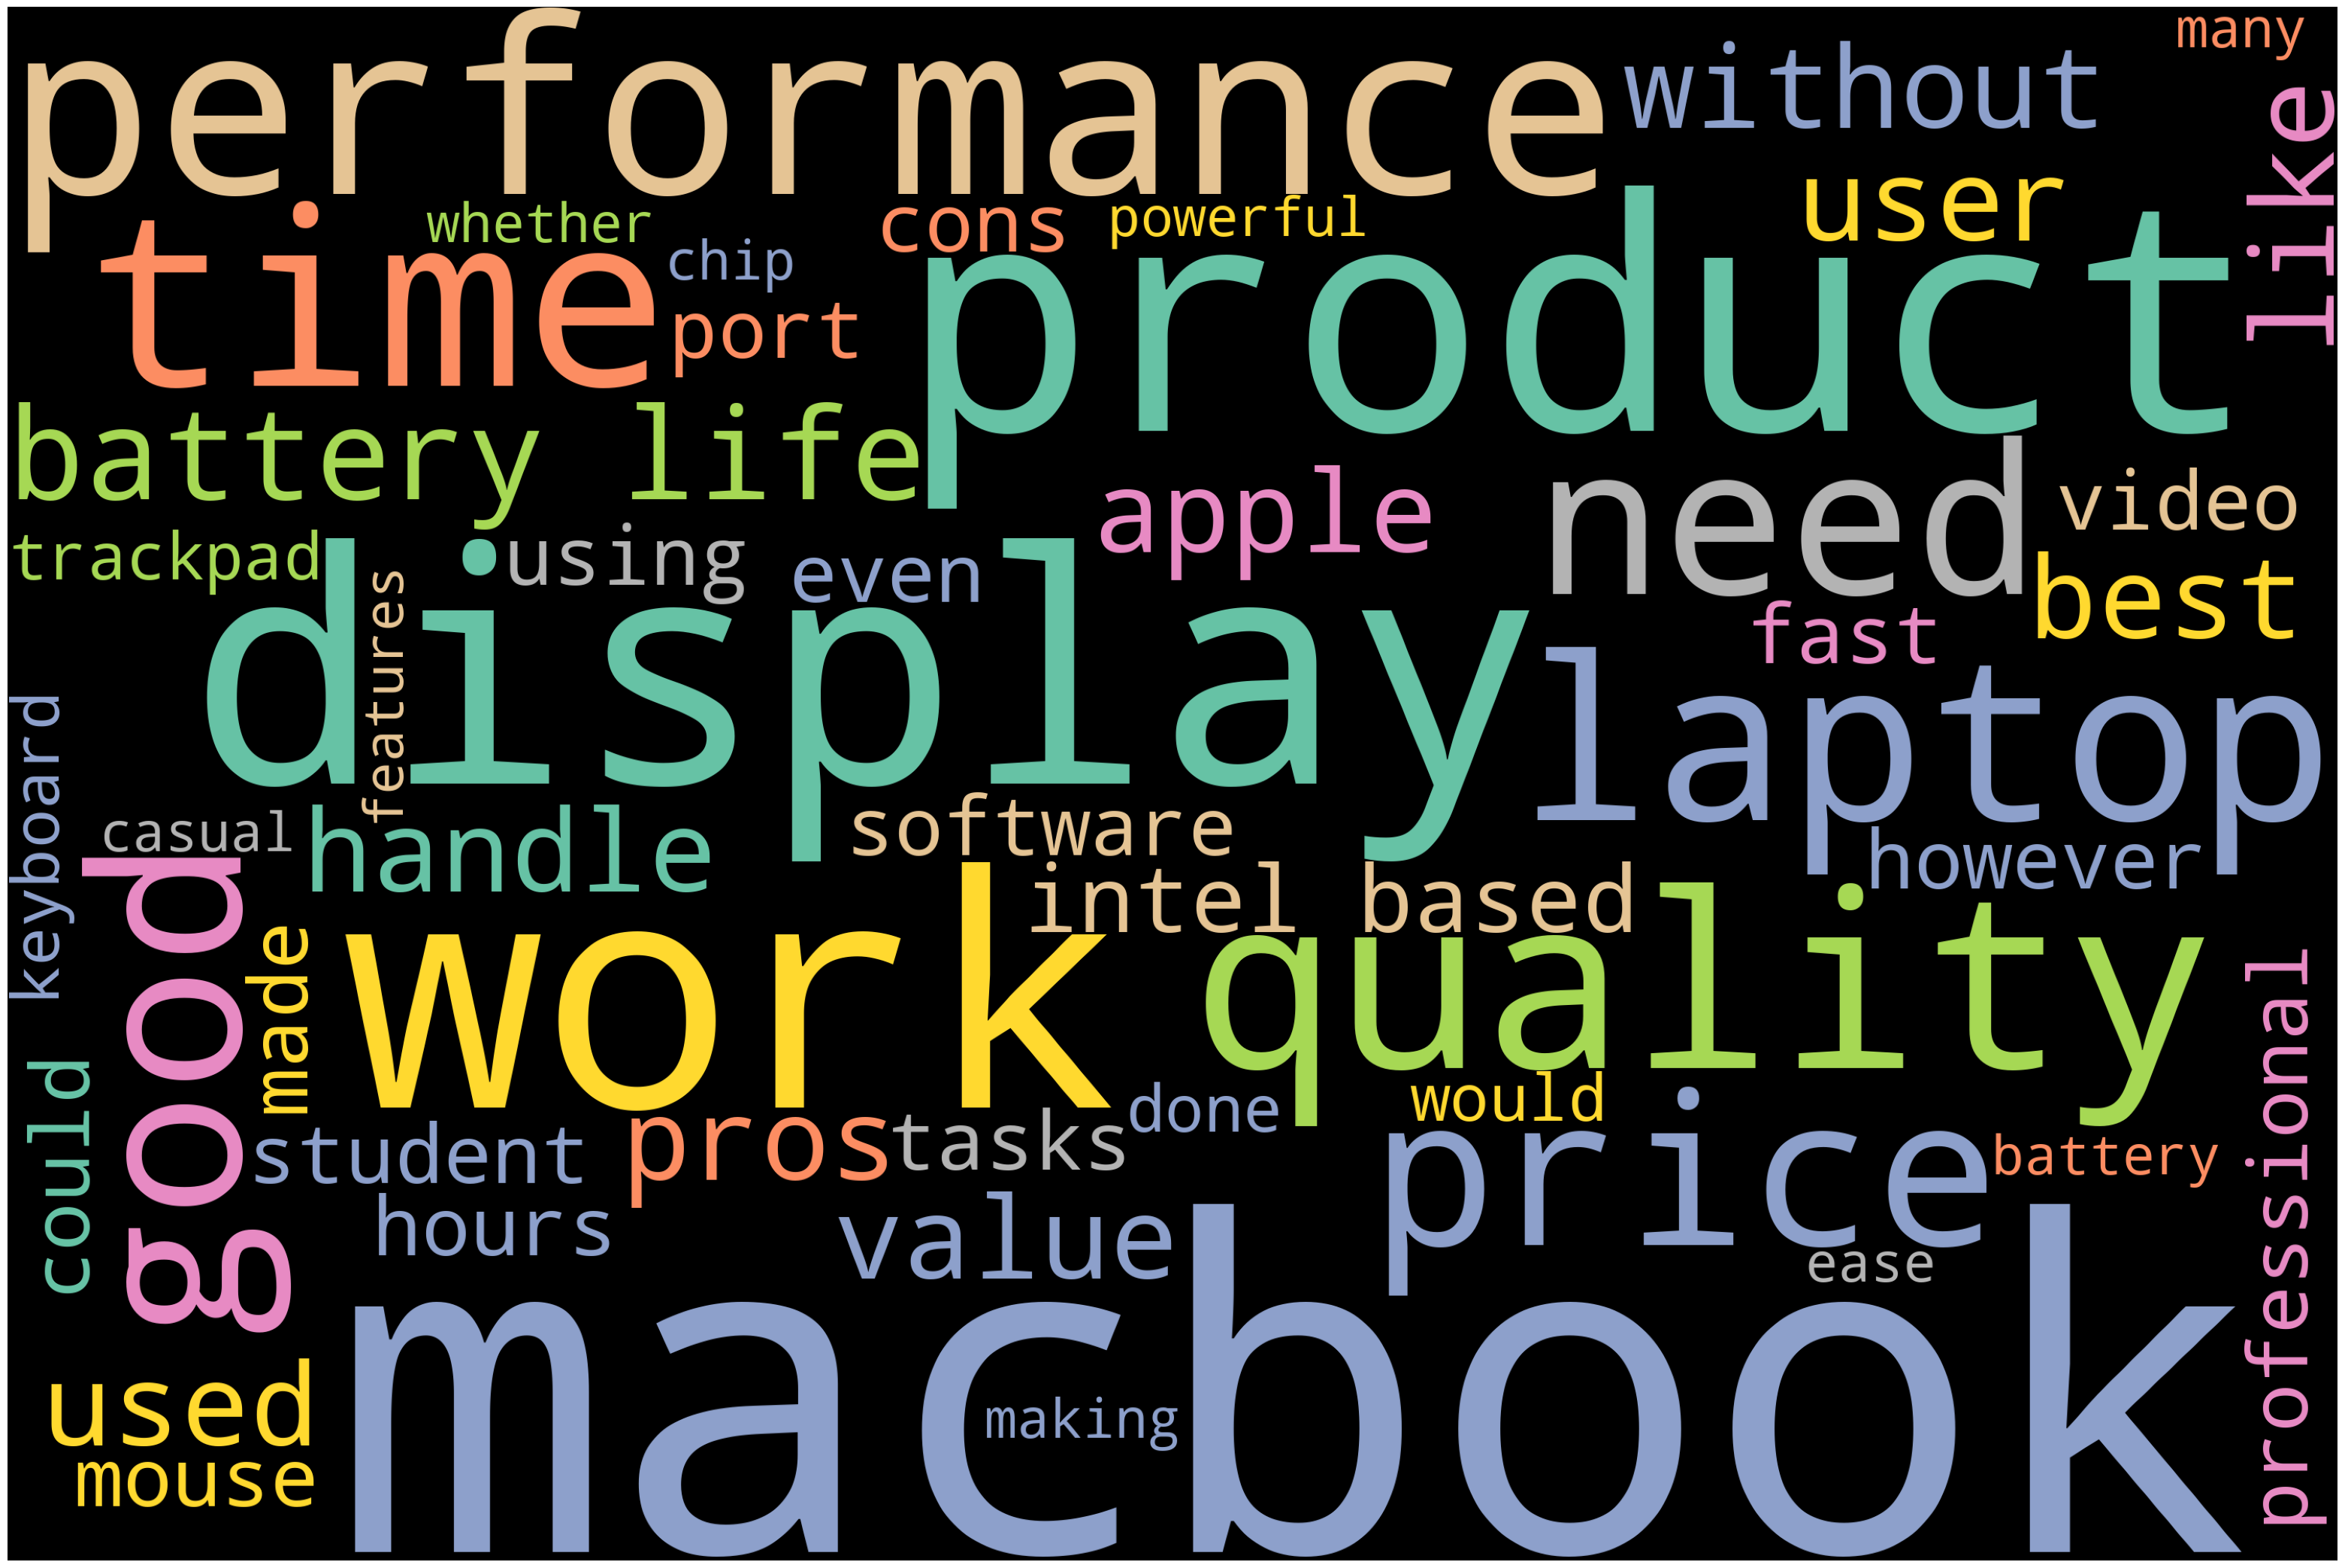

In [101]:
#plotting the wordcloud
plot_cloud(wordcloud_ip)

#Sentiment Analysis Using Afinn Database

In [102]:
#Reading the afinn database
!pip install afinn
from afinn import Afinn
afinn = Afinn()
afinn.score('This is utterly excellent!')

3.0

In [103]:
#Testing the function
word = 'good'
afinn.score(word)

3.0

In [114]:
df_mac = pd.DataFrame({'Reviews':mac_reviews})
df_mac

,Reviews
0,\n1. Performance:The M1 MacBook Air is incredi...
1,"\nI am a student using this laptop for coding,..."
2,\nI got my product delivered earlier this week...
3,\nOne of the best display I ever used quality ...
4,\nIf you are college student you can definitel...
5,\nI am amazed that I have taken decision to bu...
6,\nThis product is best quality . It's appeara...
7,"\nBlazing fast performance, incredible battery..."
8,\nIf you're ordering this amazing piece of tec...
9,\nI had mac password issue.. i had to give it ...


In [117]:
#Converting the sentences to lower case
df_mac = df_mac.applymap(lambda s: s.lower() if type(s) ==str else s)
df_mac

,Reviews,afinn_sent_score
0,\n1. performance:the m1 macbook air is incredi...,32.0
1,"\ni am a student using this laptop for coding,...",20.0
2,\ni got my product delivered earlier this week...,17.0
3,\none of the best display i ever used quality ...,10.0
4,\nif you are college student you can definitel...,7.0
5,\ni am amazed that i have taken decision to bu...,9.0
6,\nthis product is best quality . it's appeara...,11.0
7,"\nblazing fast performance, incredible battery...",9.0
8,\nif you're ordering this amazing piece of tec...,26.0
9,\ni had mac password issue.. i had to give it ...,0.0


In [119]:
#Removing the \n from each sentence
df_mac['Reviews'] = df_mac['Reviews'].str.replace('\n','')
df_mac

,Reviews,afinn_sent_score
0,1. performance:the m1 macbook air is incredibl...,32.0
1,"i am a student using this laptop for coding, s...",20.0
2,i got my product delivered earlier this week. ...,17.0
3,one of the best display i ever used quality wa...,10.0
4,if you are college student you can definitely ...,7.0
5,i am amazed that i have taken decision to buy ...,9.0
6,this product is best quality . it's appearanc...,11.0
7,"blazing fast performance, incredible battery l...",9.0
8,if you're ordering this amazing piece of techn...,26.0
9,i had mac password issue.. i had to give it to...,0.0


In [120]:
#Removing the punctuations
df_mac['Reviews'] = df_mac['Reviews'].apply(lambda x: x.translate(str.maketrans('','',string.punctuation)))
df_mac

,Reviews,afinn_sent_score
0,1 performancethe m1 macbook air is incredibly ...,32.0
1,i am a student using this laptop for coding st...,20.0
2,i got my product delivered earlier this week m...,17.0
3,one of the best display i ever used quality wa...,10.0
4,if you are college student you can definitely ...,7.0
5,i am amazed that i have taken decision to buy ...,9.0
6,this product is best quality its appearance ...,11.0
7,blazing fast performance incredible battery li...,9.0
8,if youre ordering this amazing piece of techno...,26.0
9,i had mac password issue i had to give it to t...,0.0


In [121]:
#Applying the sentiment score function to all the sentence
df_mac['afinn_sent_score'] = df_mac['Reviews'].apply(afinn.score)
df_mac

,Reviews,afinn_sent_score
0,1 performancethe m1 macbook air is incredibly ...,26.0
1,i am a student using this laptop for coding st...,12.0
2,i got my product delivered earlier this week m...,17.0
3,one of the best display i ever used quality wa...,10.0
4,if you are college student you can definitely ...,7.0
5,i am amazed that i have taken decision to buy ...,8.0
6,this product is best quality its appearance ...,11.0
7,blazing fast performance incredible battery li...,7.0
8,if youre ordering this amazing piece of techno...,20.0
9,i had mac password issue i had to give it to t...,0.0


In [122]:
#Sentiment Score for the whole review
df_mac['afinn_sent_score'].sum()

118.0

In [123]:
#Adding Word Count for each sentence in the dataframe
df_mac['word_count'] = df_mac['Reviews'].str.split().apply(len)
df_mac

,Reviews,afinn_sent_score,word_count
0,1 performancethe m1 macbook air is incredibly ...,26.0,333
1,i am a student using this laptop for coding st...,12.0,203
2,i got my product delivered earlier this week m...,17.0,181
3,one of the best display i ever used quality wa...,10.0,22
4,if you are college student you can definitely ...,7.0,45
5,i am amazed that i have taken decision to buy ...,8.0,87
6,this product is best quality its appearance ...,11.0,30
7,blazing fast performance incredible battery li...,7.0,43
8,if youre ordering this amazing piece of techno...,20.0,203
9,i had mac password issue i had to give it to t...,0.0,23


<Axes: xlabel='afinn_sent_score', ylabel='Density'>

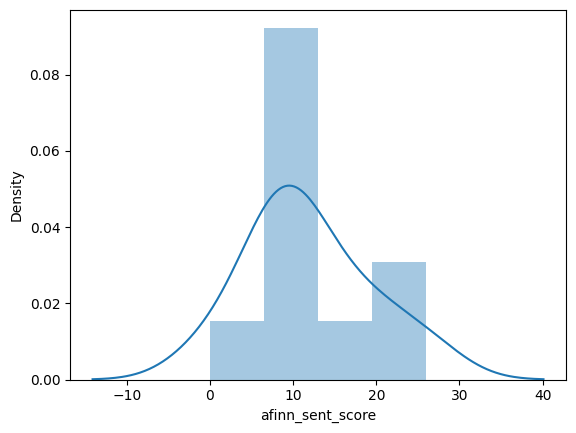

In [124]:
#Distribution plot of the Afinn Sent Score
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
sns.distplot(df_mac['afinn_sent_score'])

<Axes: ylabel='afinn_sent_score'>

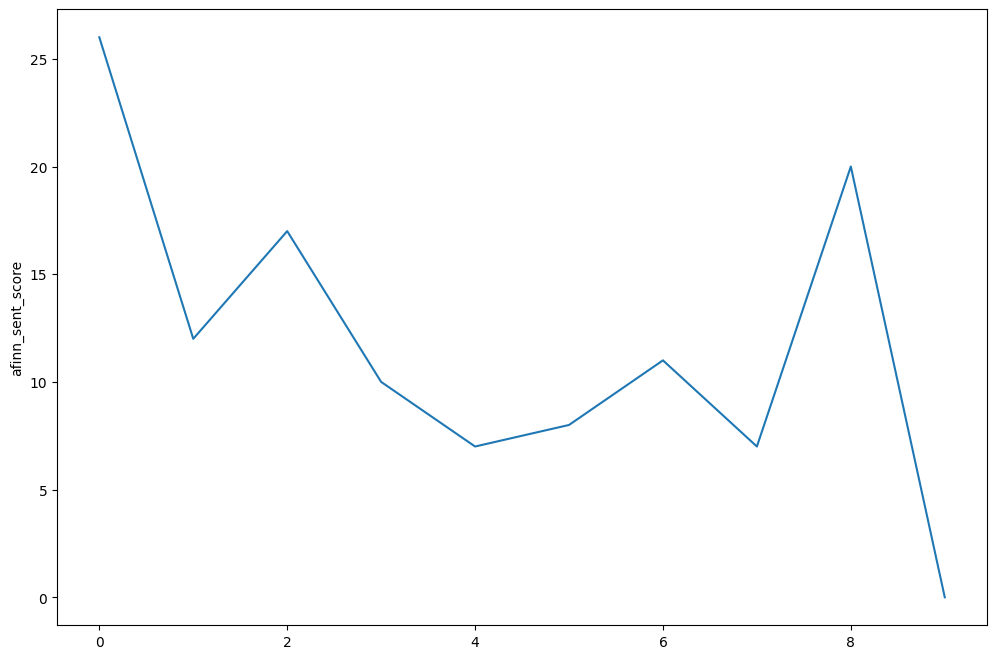

In [125]:
#Line plot of the Afinn Sentiment Score
plt.figure(figsize=(12,8))
sns.lineplot(y='afinn_sent_score', x=range(0,len(df_mac)), data=df_mac)

<Axes: title={'center': 'Sentence Sentiment Value VS sentence word count'}, xlabel='word_count', ylabel='afinn_sent_score'>

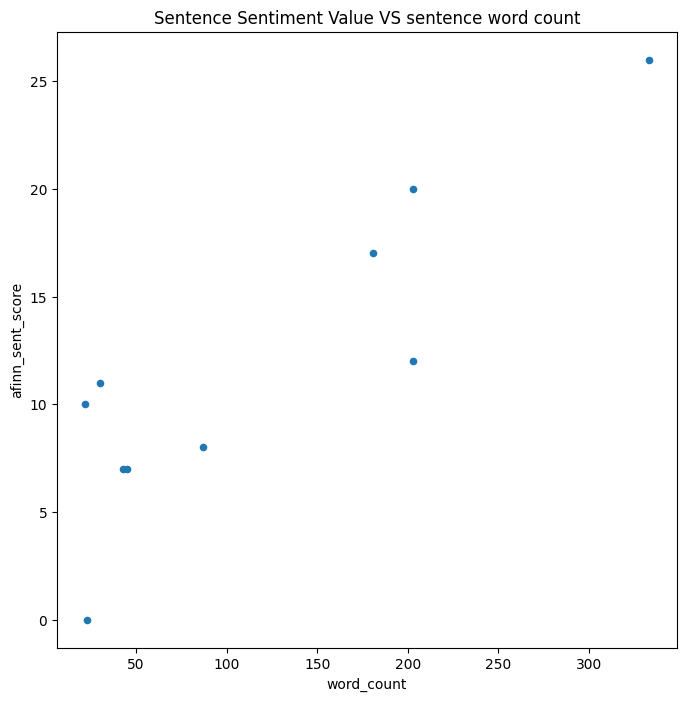

In [126]:
#Scatter plot between word count and Setiment Score using Afinn Database
df_mac.plot.scatter(x ='word_count', y ='afinn_sent_score', figsize =(8,8), title = "Sentence Sentiment Value VS sentence word count")